# Import libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150

In [2]:
df = pd.read_csv("./datasets/titanic_train.csv")

# Exploratory Data Analysis

## Initial exploration

In [3]:
# Check details of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that our dataframe has 11 columns with 891 entries, with different data types such as integers, floats, and objects. We can visualize the first 5 entries of our dataset:

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It seems like our *object* data types are string-like. Now we can begin cleaning our dataset.

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Feature visualization

### Fare

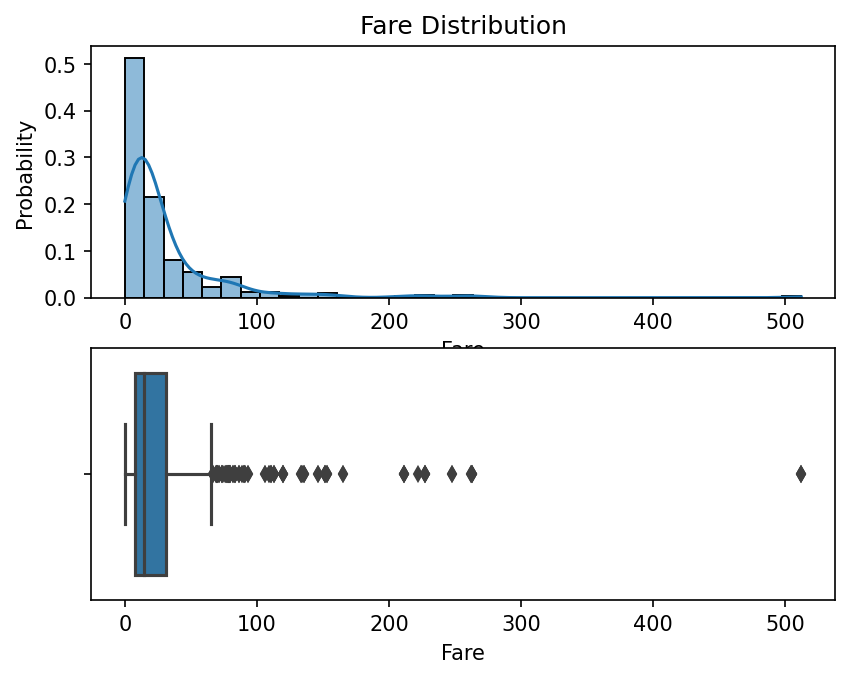

In [19]:
fig, axes = plt.subplots(2,1)

sns.histplot(data=df, x="Fare", kde=True, stat="probability", bins=35, ax = axes[0])
axes[0].set_title("Fare Distribution")

sns.boxplot(data=df, x="Fare", ax=axes[1])

plt.show()

### Age

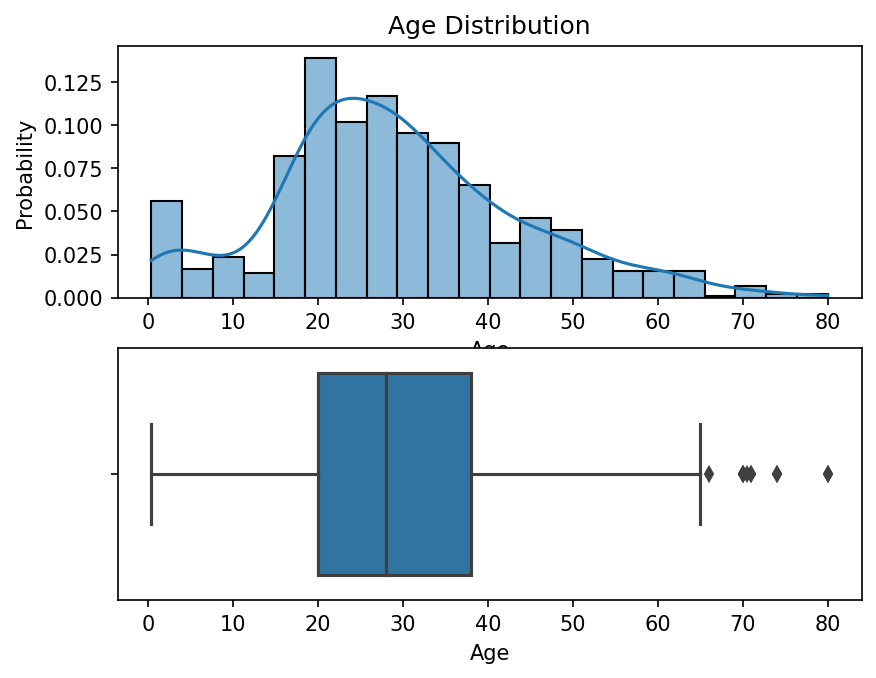

In [20]:
fig, axes = plt.subplots(2,1)

sns.histplot(data=df, x="Age", kde=True, stat="probability", ax = axes[0])
axes[0].set_title("Age Distribution")

sns.boxplot(data=df, x="Age", ax=axes[1])

plt.show()

### Survived

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S


In [22]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

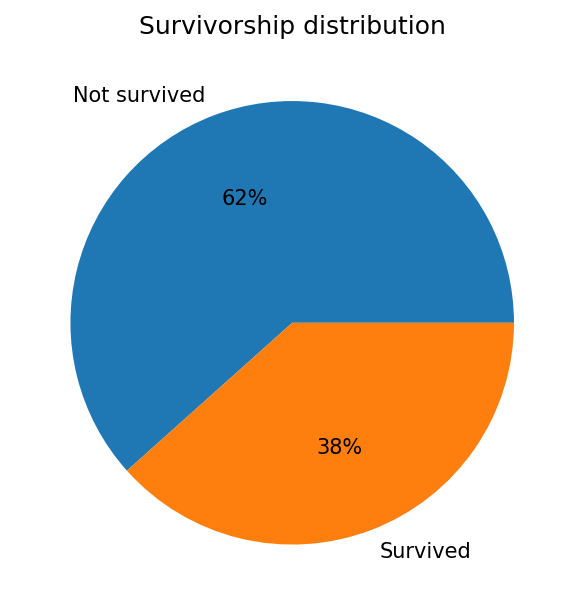

In [23]:
fig, ax = plt.subplots()
ax.pie(df.Survived.value_counts(), labels=["Not survived", "Survived"], autopct="%.0f%%")
ax.set_title("Survivorship distribution")
plt.show()

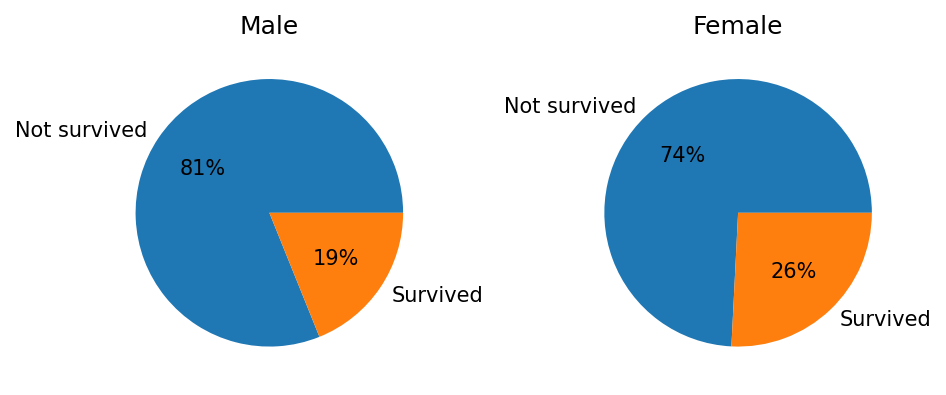

In [24]:
fig, axes = plt.subplots(1,2)

axes[0].pie(df.Survived.where(df.Sex == "male").value_counts(), labels=["Not survived", "Survived"], autopct="%.0f%%")
axes[0].set_title("Male")

axes[1].pie(df.Survived.where(df.Sex == "female").value_counts(), labels=["Not survived", "Survived"], autopct="%.0f%%")
axes[1].set_title("Female")

plt.tight_layout()
plt.show()

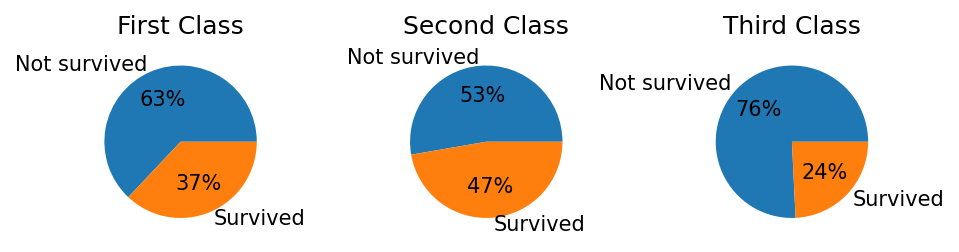

In [25]:
fig, axes = plt.subplots(1,3)

axes[0].pie(df.Survived.where(df.Pclass == 1).value_counts(), labels=["Not survived", "Survived"], autopct="%.0f%%")
axes[0].set_title("First Class")

axes[1].pie(df.Survived.where(df.Pclass == 2).value_counts(), labels=["Not survived", "Survived"], autopct="%.0f%%")
axes[1].set_title("Second Class")

axes[2].pie(df.Survived.where(df.Pclass == 3).value_counts(), labels=["Not survived", "Survived"], autopct="%.0f%%")
axes[2].set_title("Third Class")


plt.tight_layout()
plt.show()

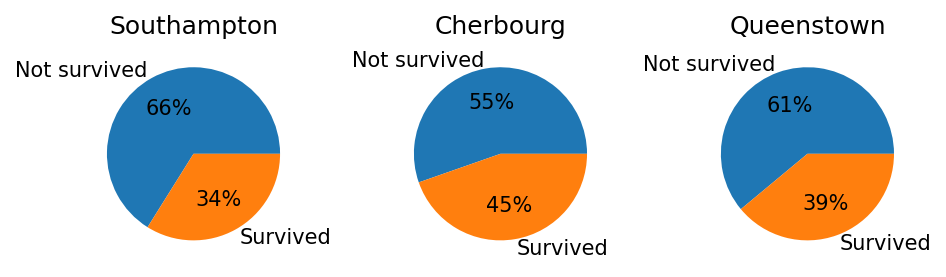

In [26]:
fig, axes = plt.subplots(1,3)

axes[0].pie(df.Survived.where(df.Embarked == "S").value_counts(), labels=["Not survived", "Survived"], autopct="%.0f%%")
axes[0].set_title("Southampton")

axes[1].pie(df.Survived.where(df.Embarked == "C").value_counts(), labels=["Not survived", "Survived"], autopct="%.0f%%")
axes[1].set_title("Cherbourg")

axes[2].pie(df.Survived.where(df.Embarked == "Q").value_counts(), labels=["Not survived", "Survived"], autopct="%.0f%%")
axes[2].set_title("Queenstown")


plt.tight_layout()
plt.show()

In [27]:
# Discrete seaborn heatmap to plot variation in survivorship based on class?

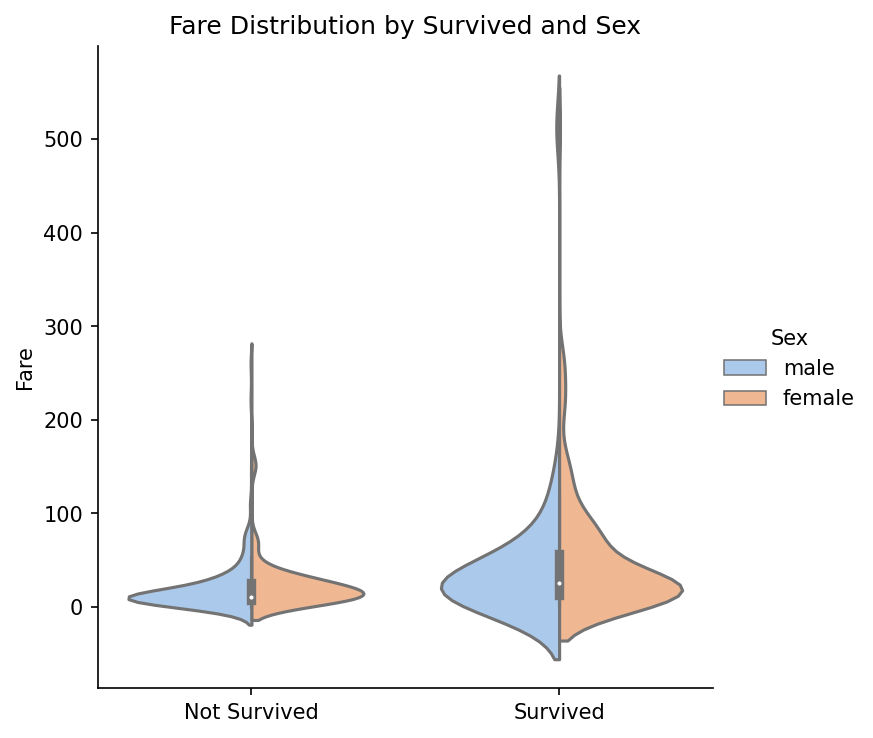

In [28]:
sns.catplot(data=df, x="Survived", y="Fare", hue="Sex", kind="violin", split=True, palette="pastel")
plt.title("Fare Distribution by Survived and Sex")
plt.xticks([0, 1], ["Not Survived", "Survived"])
plt.xlabel("")
plt.show()

In [29]:
print("Survived Fare mean:", df.Fare.where(df.Survived == 1).mean())
print("Not survived Fare mean:", df.Fare.where(df.Survived == 0).mean())

Survived Fare mean: 48.39540760233918
Not survived Fare mean: 22.117886885245902


In [30]:
print("Survived Fare median:", df.Fare.where(df.Survived == 1).median())
print("Not survived Fare median:", df.Fare.where(df.Survived == 0).median())

Survived Fare median: 26.0
Not survived Fare median: 10.5


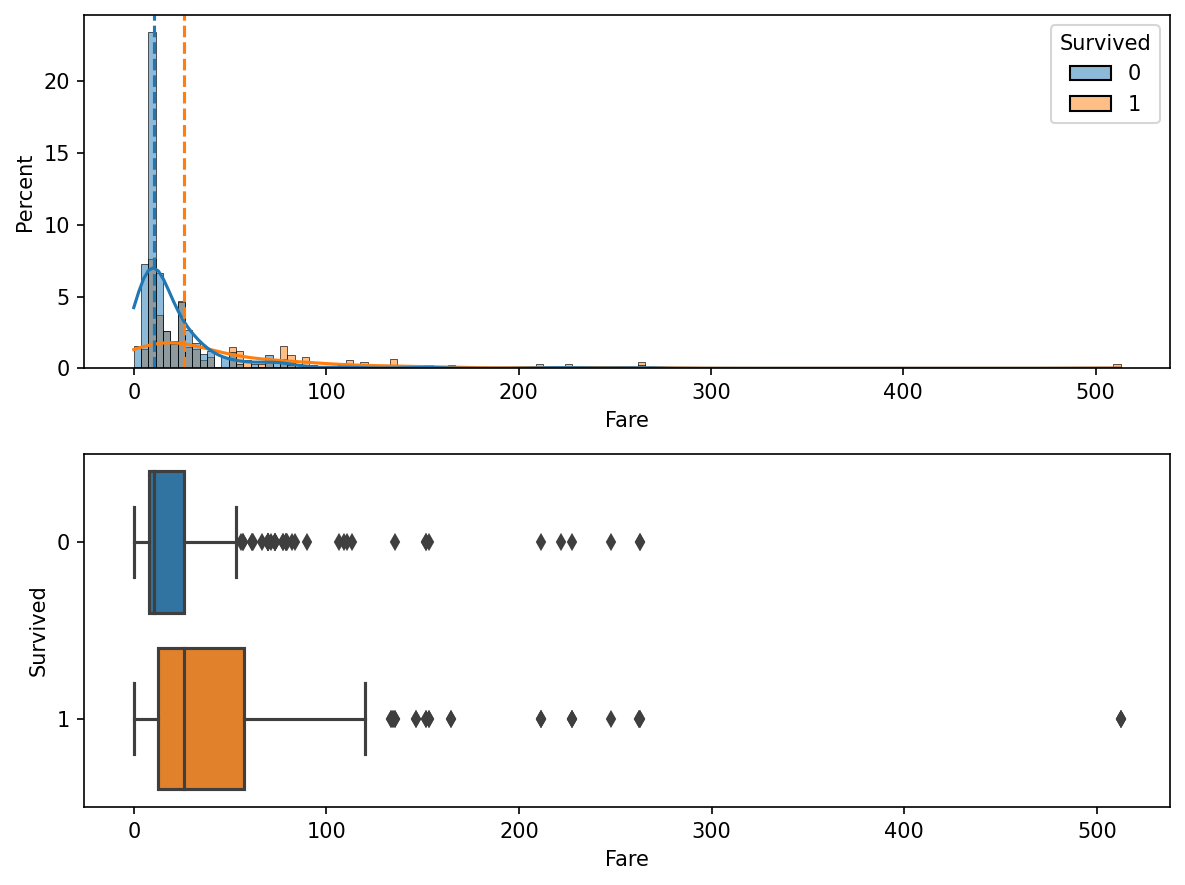

In [31]:
fig, axes = plt.subplots(2,1, figsize=(8,6))

sns.histplot(data=df, x="Fare", hue="Survived", kde=True, stat="percent", binwidth=3.8, ax=axes[0])
axes[0].axvline(df.Fare.where(df.Survived == 1).median(), c="tab:orange", linestyle="--")
axes[0].axvline(df.Fare.where(df.Survived == 0).median(), c="tab:blue", linestyle="--")

sns.boxplot(data=df, x="Fare", y="Survived", orient="h", ax=axes[1])

plt.tight_layout()
plt.show()

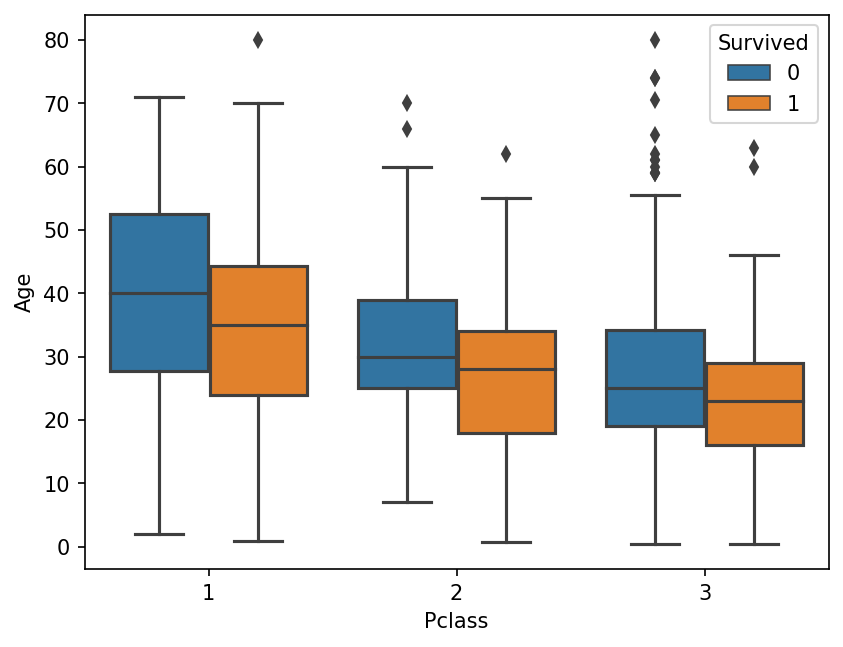

In [32]:
sns.boxplot(data=df, x="Pclass", y="Age", hue="Survived")
plt.show()